<a href="https://colab.research.google.com/github/mazizf13/Deep-Learning-CNN-Algorithm/blob/main/Deep_Learning_Based_Classification_of_Dogs_and_Cats_Images_Using_Convolutional_Neural_Network_(CNN)_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning - Based Classification of Dogs and Cats Images Using Convolutional Neural Network (CNN) Algorithm**

### **Connecting Google Drive**

In [2]:
from google.colab import drive
import os

drive.mount ('/content/drive/')

Mounted at /content/drive/


### **Checking Directories**

In [3]:
base_dir = '/content/drive/My Drive/Anjing_Kucing'
!ls "/content/drive/My Drive/Anjing_Kucing"

bahan  latih  validasi


### **Define Directories for Material, Training, and Validation Data**

In [4]:
# Menentukan direktori untuk data bahan, pelatihan, dan validasi
bahan_dir = os.path.join(base_dir, "bahan")
train_dir = os.path.join(base_dir, "latih")
validation_dir = os.path.join(base_dir, 'validasi')

### **Define Directories for Dog and Cat Images**

In [5]:
# Menentukan direktori untuk gambar Anjing dan Kucing
Anjing_dir = os.path.join(bahan_dir, 'Anjing/')
Kucing_dir = os.path.join(bahan_dir, 'Kucing/')

print('Jumlah Data Train Tiap Kelas')
print('Jumlah gambar Anjing :', len(os.listdir(Anjing_dir)))
print('Jumlah gambar Kucing :', len(os.listdir(Kucing_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar Anjing : 25
Jumlah gambar Kucing : 25


### **Training and Validation Content Directory**

In [6]:
# Direktori isi latih/training
train_Anjing = os.path.join(train_dir, 'Anjing/')
train_Kucing = os.path.join(train_dir, 'Kucing/')

# Direktori isi validasi
validation_Anjing = os.path.join(validation_dir, 'Anjing/')
validation_Kucing = os.path.join(validation_dir, 'Kucing/')

### **Sharing Data for Training and Validation**

In [7]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os. listdir(source) )
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random. sample(os. listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_files = source + i
    destination = val + i
    copyfile(i_file, destination)

#jumlah pembagian data training dan testing
train_ratio = 0.9

#pembagian Training dan Validasi
# Training
source_00 = Anjing_dir
train_00 = train_Anjing
val_00 = validation_Anjing
train_val_split(source_00, train_00, val_00, train_ratio)

# Validasi
source_01 = Kucing_dir
train_01 = train_Kucing
val_01 = validation_Kucing
train_val_split(source_01, train_01, val_01, train_ratio)

In [8]:
print('Jumlah All Anjing :', len(os.listdir(Anjing_dir)))
print('Jumlah Train Anjing :', len(os.listdir(train_Anjing)))
print('Jumlah Val Anjing :', len(os.listdir(validation_Anjing)))

Jumlah All Anjing : 25
Jumlah Train Anjing : 25
Jumlah Val Anjing : 13


### **Augmentation and Setup of Data Generator**

In [10]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

val_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

In [14]:
train_generator = train_datagen. flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

val_generator = val_datagen. flow_from_directory (
    validation_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 50 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


### **Create and Train Model**

In [17]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print('\nAkurasi mencapai 99%')
            self.model.stop_training = True

callbacks = myCallback()


In [19]:
model = tf. keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf. keras.layers.Conv2D(32, (3, 3), activation = 'relu' ),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf. keras. layers.MaxPooling2D(2, 2),
    tf. keras. layers.Flatten(),
    tf.keras. layers.Dense(200, activation = 'relu'),
    tf. keras. layers. Dropout (0.3, seed=112),
    tf. keras. layers.Dense(500, activation = 'relu'),
    tf. keras. layers.Dropout (0.5, seed=112),
    tf. keras. layers.Dense(2, activation = 'sigmoid'),
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)        0

In [23]:
from tensorflow.keras import metrics
model.compile(loss = 'categorical_crossentropy',
               optimizer = "Adam",
               metrics = ['accuracy' ])

In [24]:
from IPython. core import history
history = model.fit(
    train_generator,
    steps_per_epoch = 2,
    epochs = 25,
    validation_data = val_generator,
    validation_steps = 1,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/25
2/2 [==============================] - 34s 25s/step - loss: 0.7306 - accuracy: 0.4000 - val_loss: 0.7450 - val_accuracy: 0.4000
Epoch 2/25
2/2 [==============================] - 18s 14s/step - loss: 0.7746 - accuracy: 0.5500 - val_loss: 0.8328 - val_accuracy: 0.2000
Epoch 3/25
2/2 [==============================] - 17s 14s/step - loss: 0.8427 - accuracy: 0.3000 - val_loss: 0.6860 - val_accuracy: 0.5000
Epoch 4/25
2/2 [==============================] - 15s 13s/step - loss: 0.7012 - accuracy: 0.5000 - val_loss: 0.6890 - val_accuracy: 0.6000
Epoch 5/25
2/2 [==============================] - 17s 14s/step - loss: 0.6972 - accuracy: 0.5500 - val_loss: 0.6864 - val_accuracy: 0.6000
Epoch 6/25
2/2 [==============================] - 15s 12s/step - loss: 0.6994 - accuracy: 0.4500 - val_loss: 0.6899 - val_accuracy: 0.6000
Epoch 7/25
2/2 [==============================] - 16s 13s/step - loss: 0.6888 - accuracy: 0.5000 - val_loss: 0.6784 - val_accuracy: 0.8000
Epoch 8/25
2/2 [===========

### **Display Accuracy and Loss Graph**

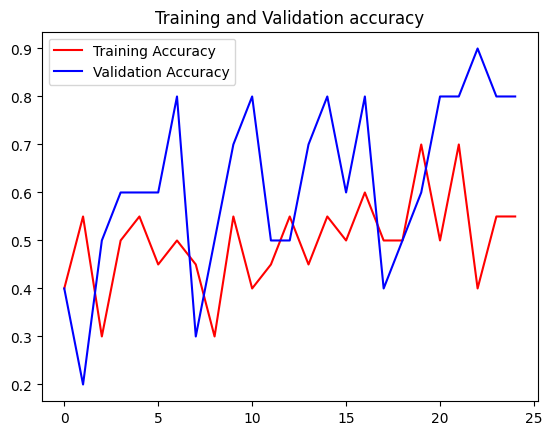

In [25]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='best')
plt.show()

### **Prediction of New Image**

Saving anjing (8).jpg to anjing (8).jpg
1/1 [==============================] - 0s 29ms/step
anjing (8).jpg
This image belongs to class Anjing


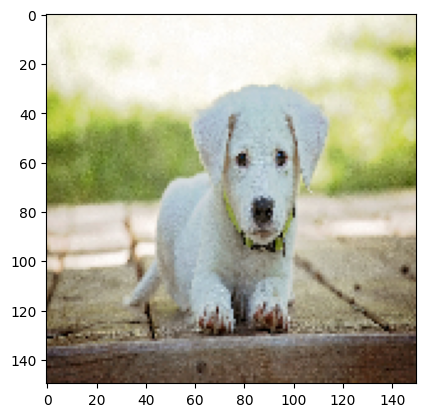

In [33]:
import numpy as np
import keras
import tensorflow as tf
import keras.utils as image
from tensorflow.keras.utils import load_img, img_to_array
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
    # Predicting image
    path = fn
    img = keras.utils.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=100)

    print(fn)

    class_list = os.listdir(train_dir)

    predicted_class_index = np.argmax(classes, axis=1)[0]
    predicted_class = class_list[predicted_class_index]
    print('This image belongs to class', predicted_class)